**PORTUGUESE BANK MARKETTING DATASET**

 This dataset is about the direct phone call marketing campaigns,which aim to promote term deposits among existing customers,by a Portuguese banking institution from May 2008 to November 2010. We will try to build models that can pedict whether or not the client targeted by the campaign ended up subscribing to a term deposit. By building models we can find ways to improve future marketting campaigns for the bank. 
 
   Term Deposit is a deposit that a bank or financial instituition offers with a fixed rate in which money will be returned back after a specific maturity time.

**IMPORTING NECESSARY PYTHON LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2]:
data=pd.read_csv('/content/Bank Marketing.csv')
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [3]:
data.shape

(45211, 17)

In [4]:
data.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit',
       'Balance (euros)', 'Housing Loan', 'Personal Loan', 'Contact',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

**STATISTICAL SUMMARY OF DATASET**

In [6]:
data.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


**CHECKING WHETHER THERE IS ANY MISSING VALUES IN THE DATASET**

In [7]:
data.isna().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

There is no any missing values in the dataset

In [8]:
data['Subscription'].value_counts()

1    39922
2     5289
Name: Subscription, dtype: int64

**Cheking whether the dataset is balanced or not**

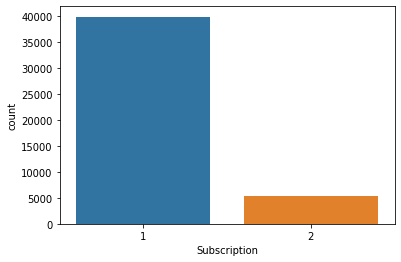

In [9]:
sns.countplot(x='Subscription',data=data)

([<matplotlib.patches.Wedge at 0x7fc53b4c8ee0>,
 [Text(-1.0265439893343442, 0.3952308666609052, '1'),
  Text(1.0265440170874796, -0.39523079457691607, '2')],
 [Text(-0.5599330850914603, 0.21558047272413008, '88.30'),
  Text(0.5599331002295342, -0.21558043340559055, '11.70')])

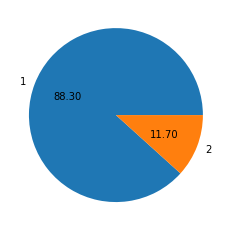

In [10]:
plt.pie(data['Subscription'].value_counts(),labels=data['Subscription'].unique(),autopct='%0.2f')

From the countplot and pie chart it is clear that the dataset is an imbalanced dataset.

**EXPLORING CATEGORICAL COLUMNS**

In [11]:
data_categorical=[x for x in data.columns if data[x].dtype=='O']
data_categorical

['Job',
 'Marital Status',
 'Education',
 'Credit',
 'Housing Loan',
 'Personal Loan',
 'Contact',
 'Last Contact Month',
 'Poutcome']

**Checking the count of categorical features**

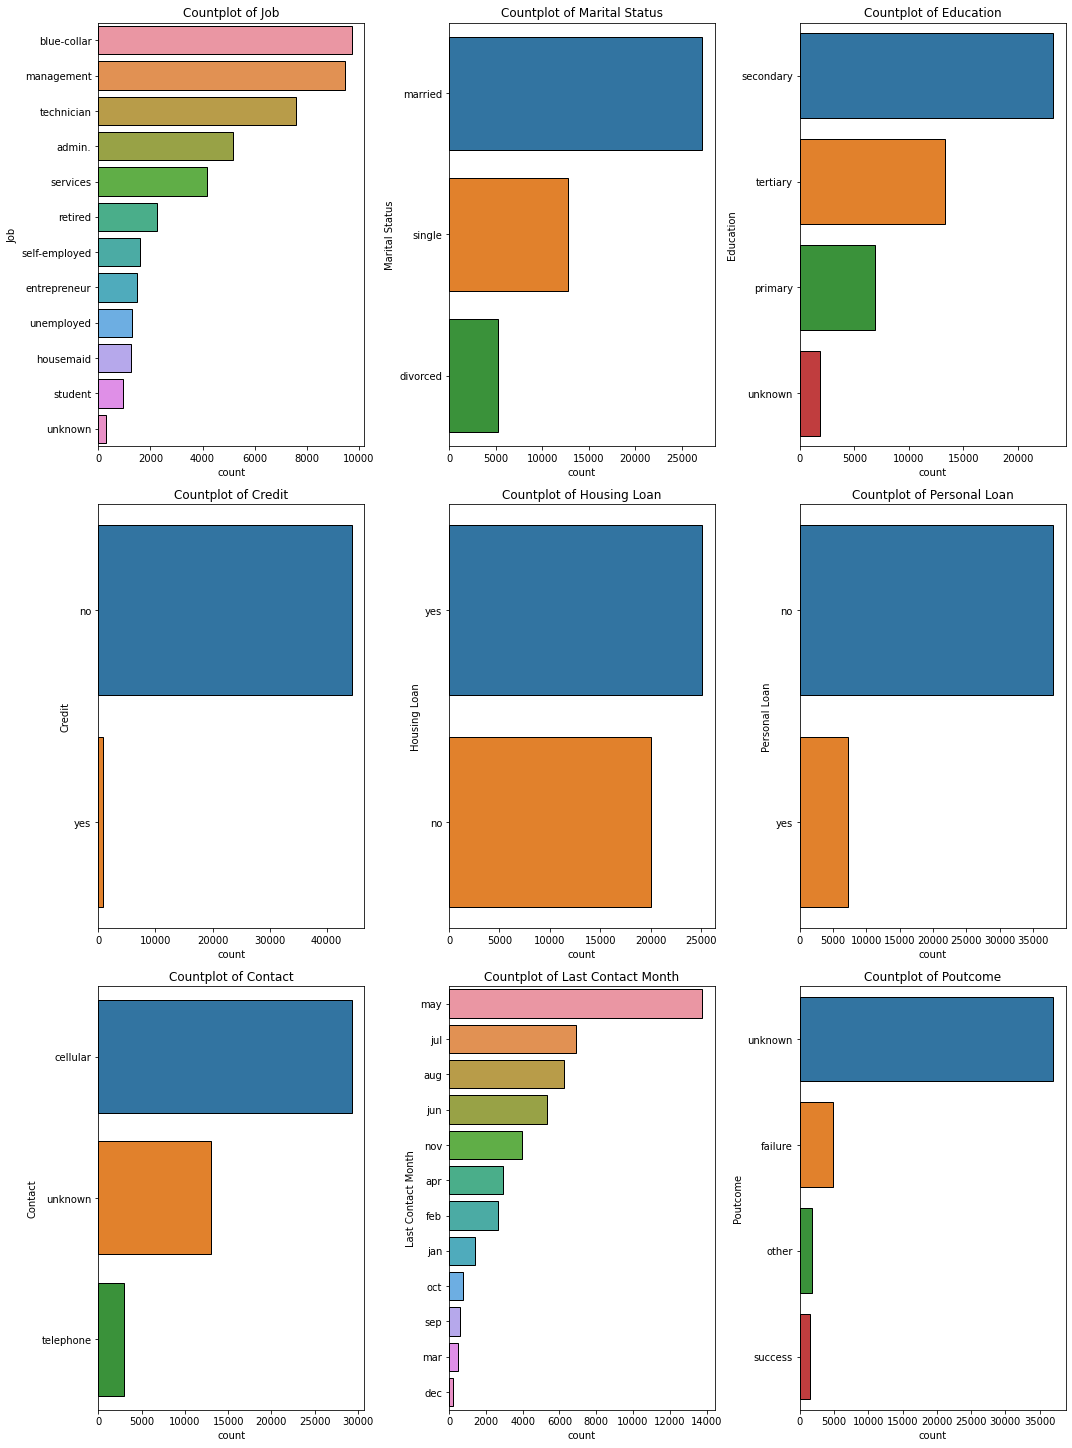

In [12]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for i in data_categorical:
  plt.subplot(12,3,plotnumber)
  sns.countplot(y=i,data=data,order=data[i].value_counts(ascending=False).index,edgecolor='black')
  plt.title('Countplot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show()

Take aways

1. Client with job title Blue collar are high in number and students are least in number.
2. Client who married are high and divorced are less.
3. Client whose education background is secondary are high in number.
4. Credit column has not much importance in the dataset since its no value is very high and yes value is very low.
5. Client with hosing loan are high but the client with personal loans are low.
6. Most of the clients are contacted in the month of May and least are contacted in december.




**Checking the relation between categorical features and target column**

Job


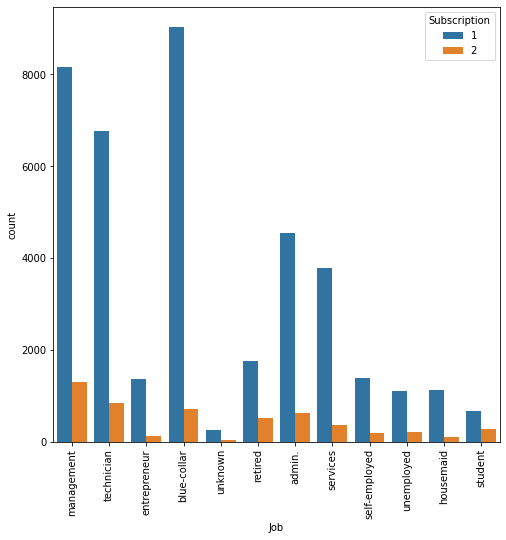

Marital Status


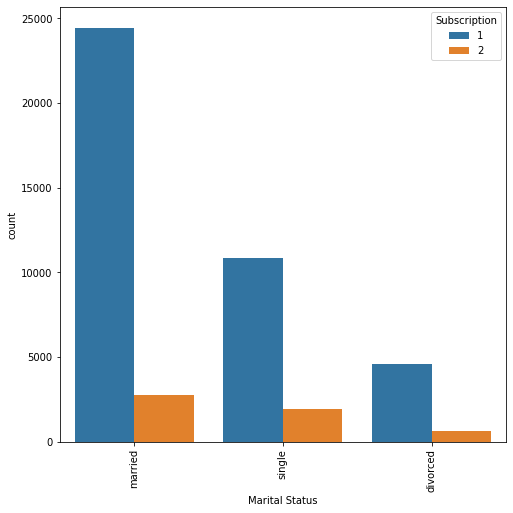

Education


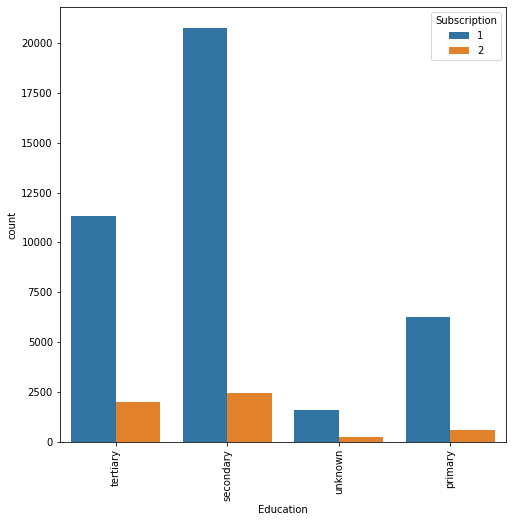

Credit


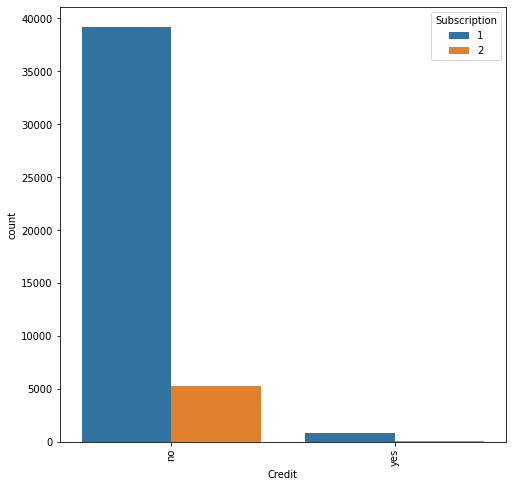

Housing Loan


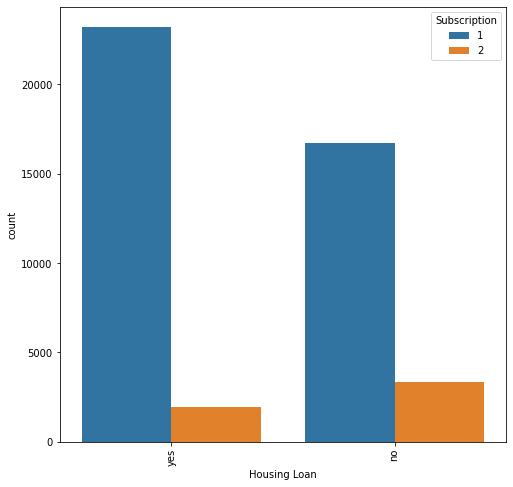

Personal Loan


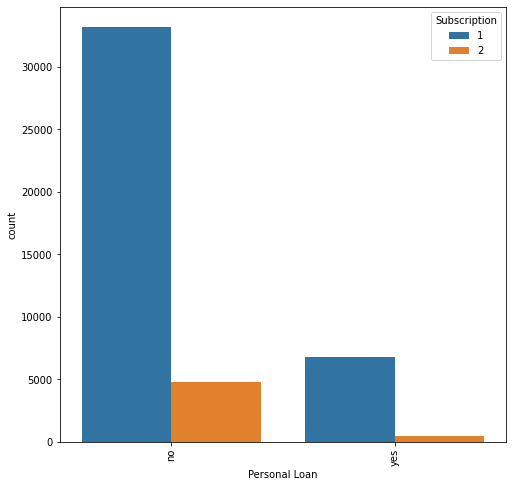

Contact


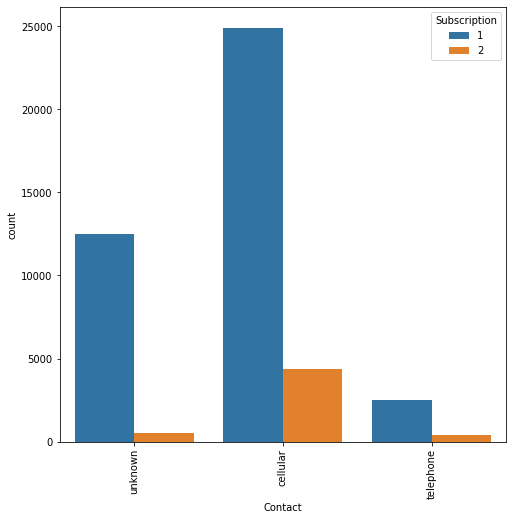

Last Contact Month


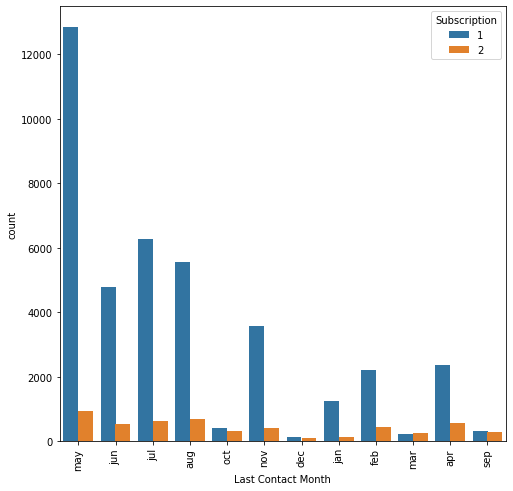

Poutcome


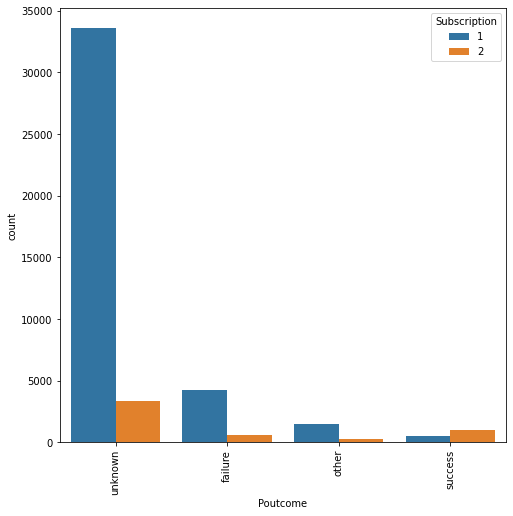

In [13]:
for i in data_categorical:
    print(i)
    
    plt.figure(figsize=(8,8))
    sns.countplot(data[i],hue=data['Subscription'])
    plt.xticks(rotation=90)
    plt.show()

**EXPLORING NUMERICAL FEATURES**

In [14]:
data_numerical=[x for x in data.columns if ((data[x].dtype!='O') & (x not in ['Subscription']))]
data_numerical

['Age',
 'Balance (euros)',
 'Last Contact Day',
 'Last Contact Duration',
 'Campaign',
 'Pdays',
 'Previous']

In [15]:
data[data_numerical].head()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**Distribution of numerical features**

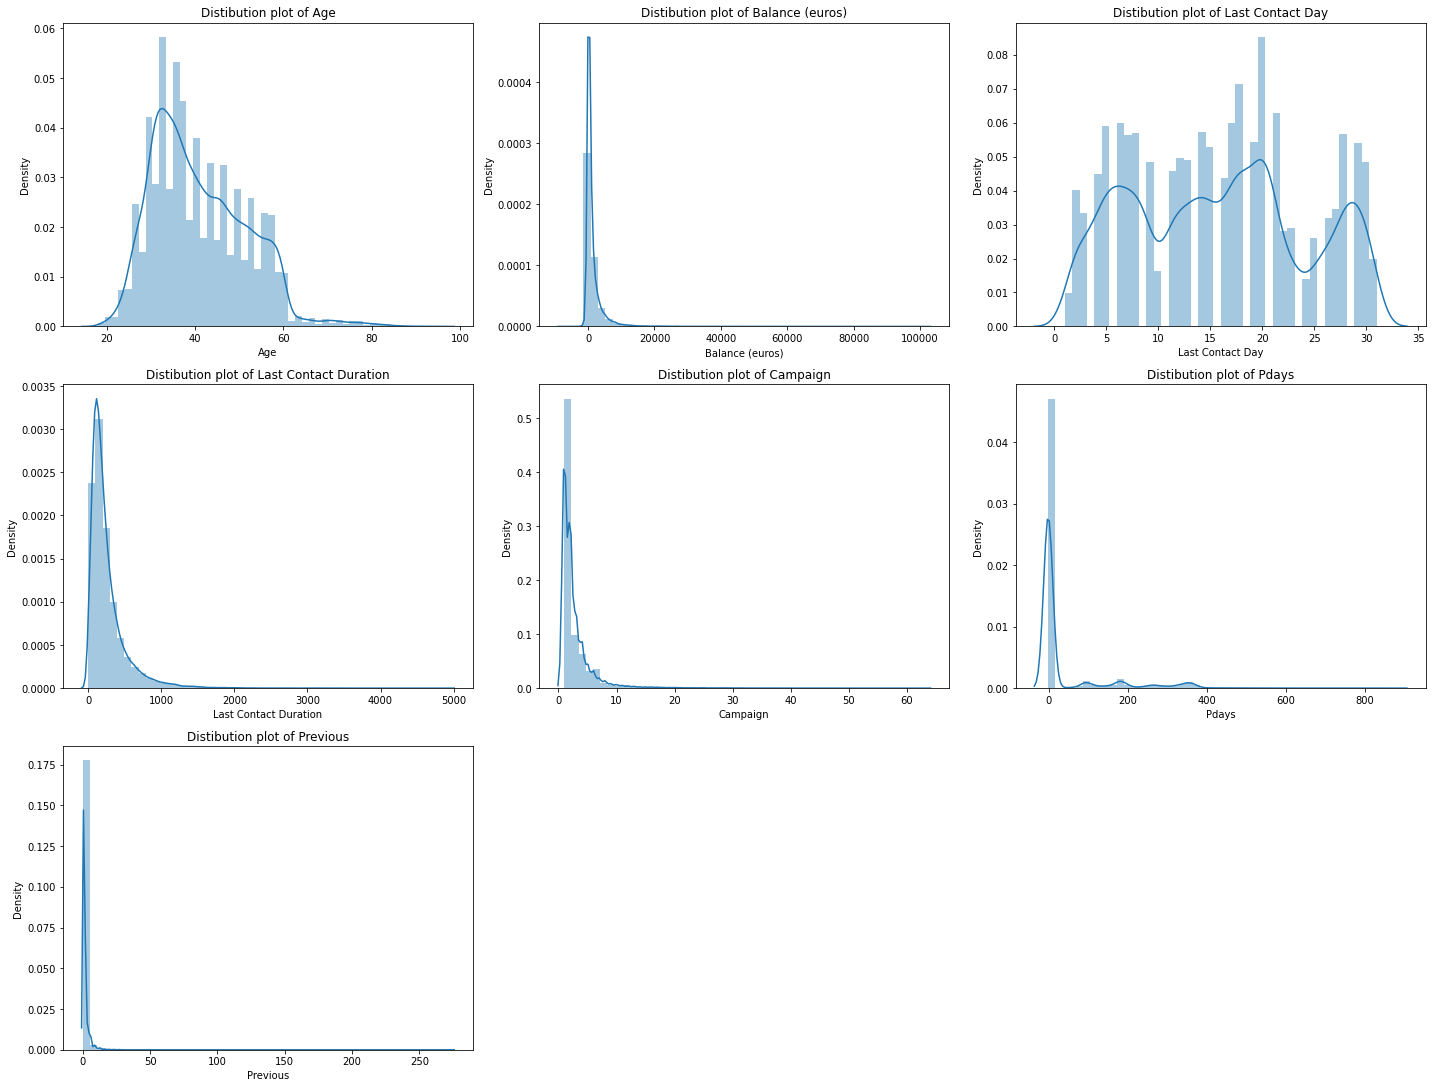

In [16]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in data_numerical:
  plt.subplot(12,3,plotnumber)
  sns.distplot(data[i])
  plt.title('Distibution plot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show()



*   Age and Last contact day are distributed normally.
*   Balance,duration campaign, pdays and previous are skewed towards left.



**To find the relation between numerical features and target column**

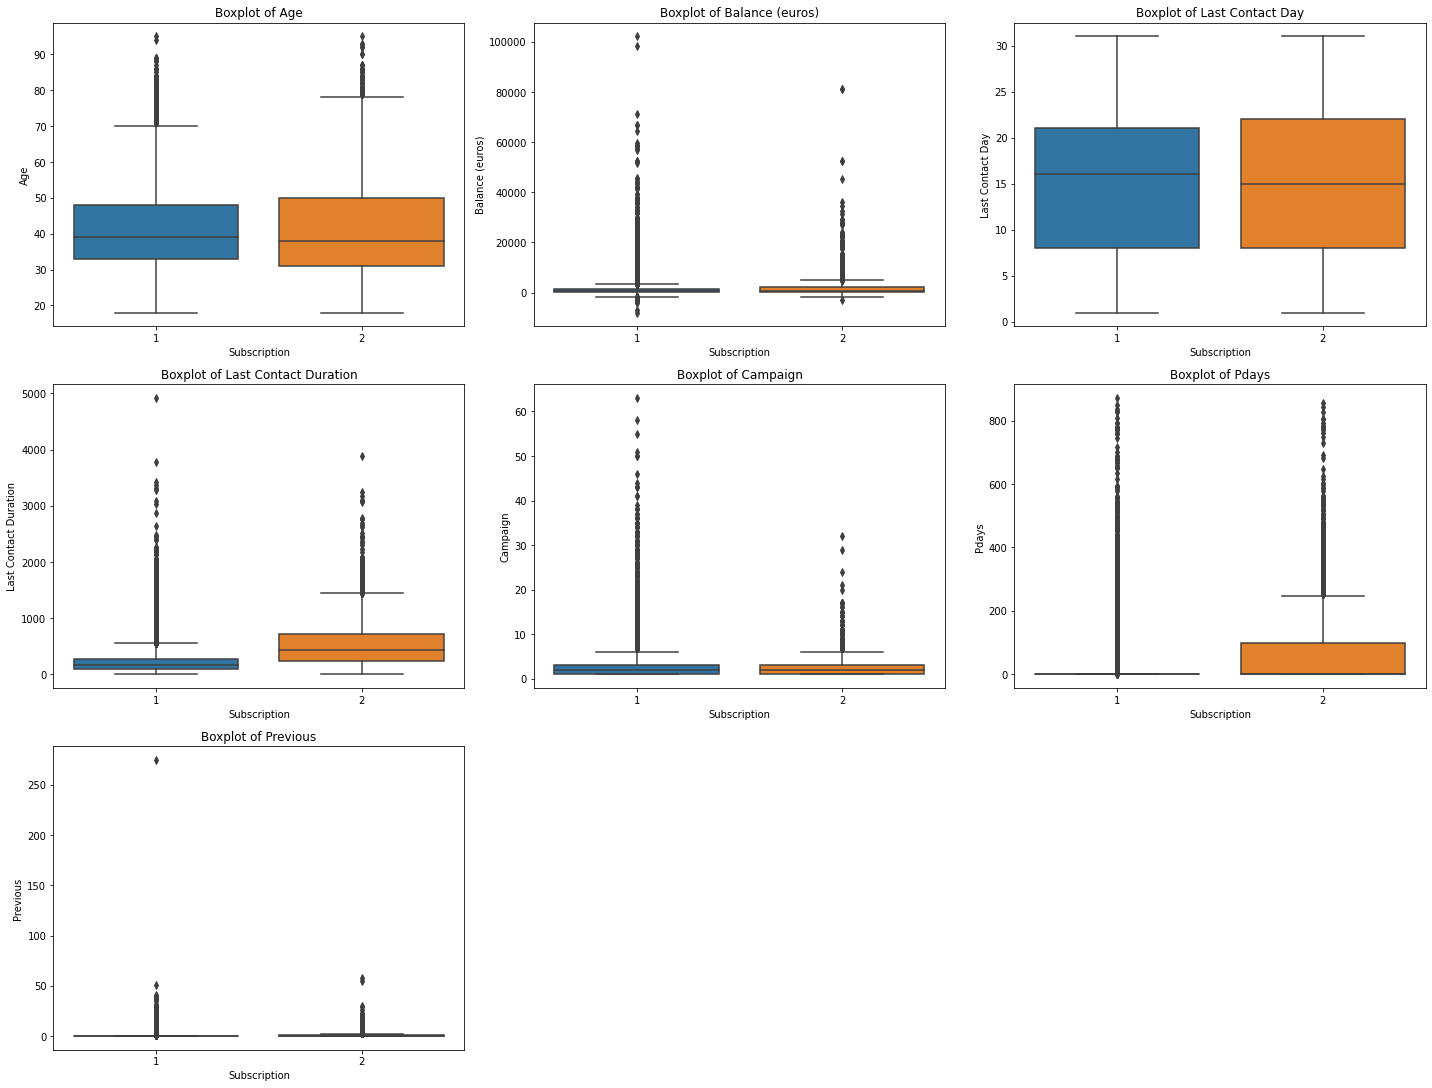

In [17]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in data_numerical:
  plt.subplot(12,3,plotnumber)
  sns.boxplot(x='Subscription',y=data[i],data=data)
  plt.title('Boxplot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show() 

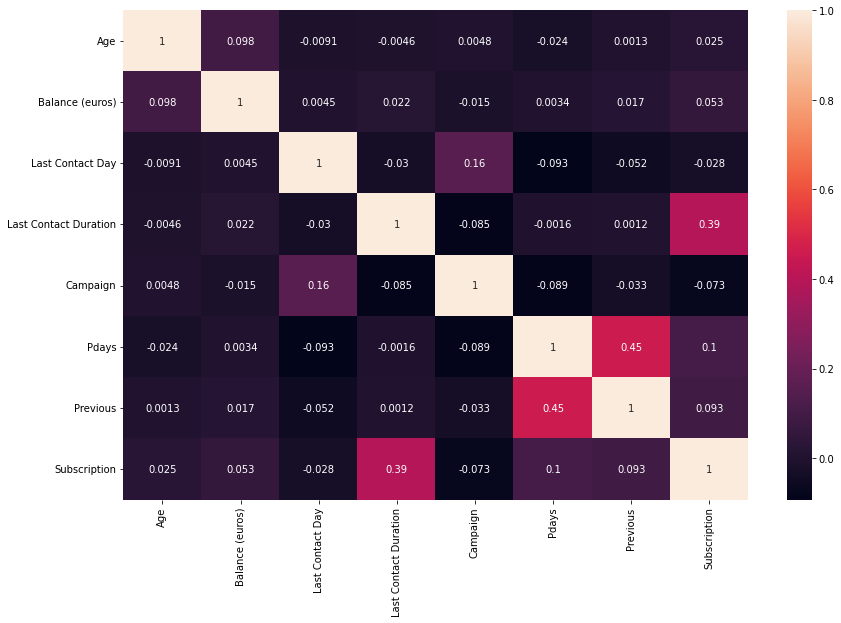

In [18]:
fig,ax =plt.subplots(figsize=(14,9))
sns.heatmap(data.corr(),annot=True)

By finding corelation there is no strong corelation between data.

**Finding outliers in numerical columns using boxplot**

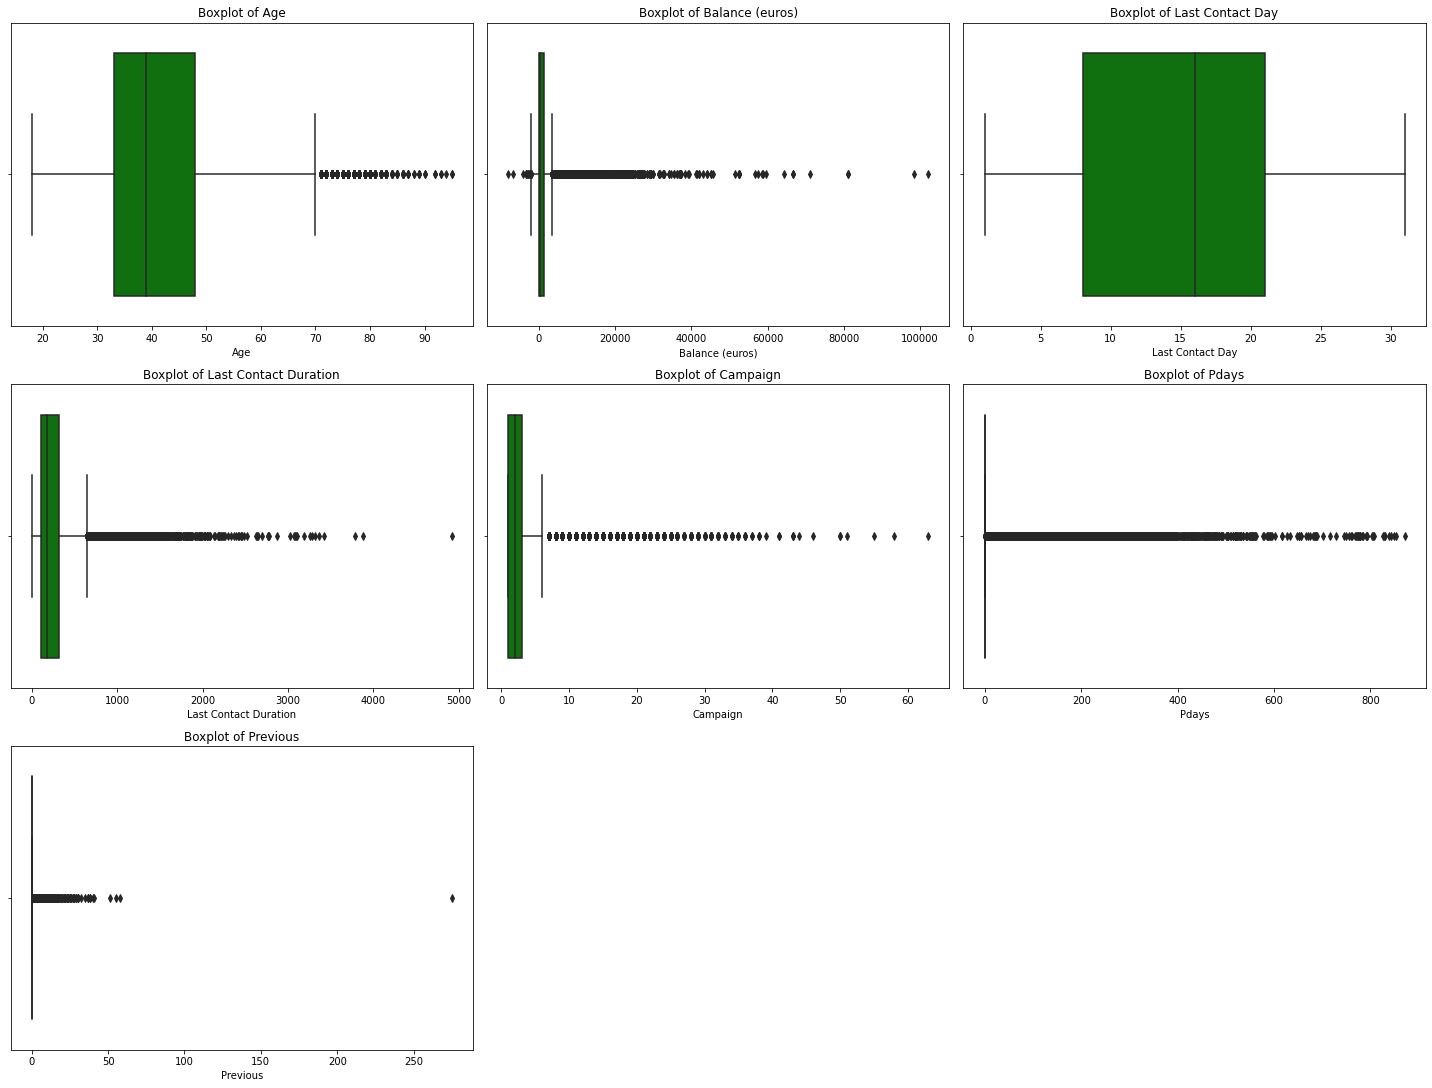

In [19]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in data_numerical:
  plt.subplot(12,3,plotnumber)
  sns.boxplot(data[i],data=data,color='green')
  plt.title('Boxplot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show()

**COLUMNS CONTAINING OUTLIERS**

In [ ]:
outlier_cols=['Age','Balance (euros)','Last Contact Duration','Campaign']

In [ ]:
data['Age'].sort_values()

42954    18
41273    18
42146    18
43637    18
40736    18
         ..
44420    93
44262    93
31233    94
41663    95
33699    95
Name: Age, Length: 45211, dtype: int64

In [ ]:
data.groupby(['Subscription','Balance (euros)'],sort=True)['Balance (euros)'].count()

Subscription  Balance (euros)
1             -8019              1
              -6847              1
              -4057              1
              -3372              1
              -3313              1
                                ..
2              34646             1
               36252             1
               45248             1
               52587             2
               81204             2
Name: Balance (euros), Length: 9258, dtype: int64

Text(0.5, 1.0, 'Boxplot before Outliers Removal')

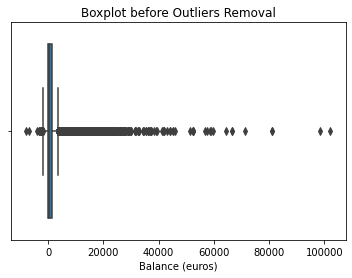

In [ ]:
sns.boxplot(x=data['Balance (euros)'],data=data)
plt.title('Boxplot before Outliers Removal')


**REMOVING OUTLIERS USING IQR METHOD**

IQR= Interquartile Range

In [ ]:
Q1=data['Balance (euros)'].quantile(0.25)
Q3=data['Balance (euros)'].quantile(0.75)
IQR=Q3-Q1
print('lower_whisker=',Q1-1.5*IQR)
print('higher_whisker=',Q3+1.5*IQR)

lower_whisker= -1962.0
higher_whisker= 3462.0


In [ ]:
balance_outliers_condition = (data['Balance (euros)']>3462.0) | (data['Balance (euros)']<-1962.0)

In [ ]:
data.drop(data[balance_outliers_condition].index,axis=0,inplace=True)

In [ ]:
data.shape

(40482, 17)

Text(0.5, 1.0, 'Boxplot after Outliers removal')

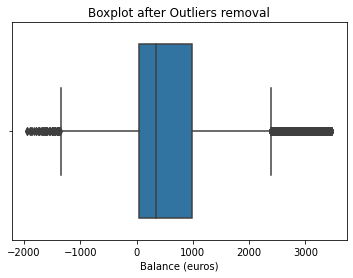

In [ ]:
sns.boxplot(x=data['Balance (euros)'],data=data)
plt.title('Boxplot after Outliers removal')

In [ ]:
Q1=data['Last Contact Duration'].quantile(0.25)
Q3=data['Last Contact Duration'].quantile(0.75)
IQR=Q3-Q1
print('lower_whisker=',Q1-1.5*IQR)
print('higher_whisker=',Q3+1.5*IQR)

lower_whisker= -216.5
higher_whisker= 635.5


In [ ]:
duration_outliers_condition = (data['Last Contact Duration']>635.5) | (data['Last Contact Duration']<-216.5)

In [ ]:
data.drop(data[duration_outliers_condition].index,axis=0,inplace=True)

In [ ]:
data.shape

(37572, 17)

Text(0.5, 1.0, 'Boxplot after outliers removal')

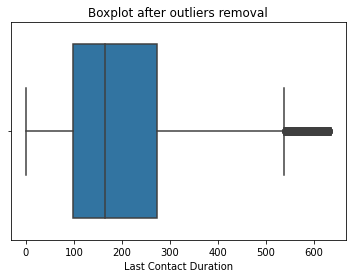

In [ ]:
sns.boxplot(x=data['Last Contact Duration'],data=data)
plt.title('Boxplot after outliers removal')

In [ ]:
Q1=data['Campaign'].quantile(0.25)
Q3=data['Campaign'].quantile(0.75)
IQR=Q3-Q1
print('lower_whisker=',Q1-1.5*IQR)
print('higher_whisker=',Q3+1.5*IQR)

lower_whisker= -2.0
higher_whisker= 6.0


In [ ]:
campaign_outliers_condition = (data['Campaign']>6.0) | (data['Campaign']<-2.0)

In [ ]:
data.drop(data[campaign_outliers_condition].index,axis=0,inplace=True)

In [ ]:
data.shape

(34967, 17)

Text(0.5, 1.0, 'Boxplot after outliers removal')

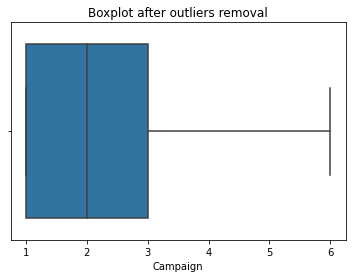

In [ ]:
sns.boxplot(x=data['Campaign'],data=data)
plt.title('Boxplot after outliers removal')

In [ ]:
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


**ENCODING CATEGORICAL VALUES**

In [ ]:
dummy=pd.get_dummies(data[['Job','Education','Last Contact Month','Poutcome','Marital Status','Credit','Contact','Pdays']],drop_first=True)
dummy

,Pdays,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown,Marital Status_married,Marital Status_single,Credit_yes,Contact_telephone,Contact_unknown
0,-1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,-1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,-1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,40,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45205,-1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
45207,-1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


**Housing Loan and Personal Loan contains only two values so we can use map function to encode it.**


In [ ]:
data['Housing Loan']=data['Housing Loan'].map({'yes': 1,'no': 0})
data['Personal Loan']=data['Personal Loan'].map({'yes': 1,'no': 0})

**Joined the two dataframes and dropped the duplicate columns**

In [ ]:
new_data=pd.concat([dummy,data],axis=1)
new_data.drop(['Job','Education','Last Contact Month','Poutcome','Marital Status','Credit','Contact','Pdays'],axis=1,inplace=True)
new_data

,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,...,Contact_unknown,Age,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Previous,Subscription
0,0,0,0,1,0,0,0,0,0,0,...,1,58,2143,1,0,5,261,1,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,44,29,1,0,5,151,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,33,2,1,1,5,76,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,47,1506,1,0,5,92,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,33,1,0,0,5,198,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,0,0,0,0,1,0,0,0,0,0,...,0,73,2850,0,0,17,300,1,8,2
45205,0,0,0,0,0,0,0,0,1,0,...,0,25,505,0,1,17,386,2,0,2
45207,0,0,0,0,1,0,0,0,0,0,...,0,71,1729,0,0,17,456,2,0,2
45209,1,0,0,0,0,0,0,0,0,0,...,0,57,668,0,0,17,508,4,0,1


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34967 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Job_blue-collar         34967 non-null  uint8
 1   Job_entrepreneur        34967 non-null  uint8
 2   Job_housemaid           34967 non-null  uint8
 3   Job_management          34967 non-null  uint8
 4   Job_retired             34967 non-null  uint8
 5   Job_self-employed       34967 non-null  uint8
 6   Job_services            34967 non-null  uint8
 7   Job_student             34967 non-null  uint8
 8   Job_technician          34967 non-null  uint8
 9   Job_unemployed          34967 non-null  uint8
 10  Job_unknown             34967 non-null  uint8
 11  Education_secondary     34967 non-null  uint8
 12  Education_tertiary      34967 non-null  uint8
 13  Education_unknown       34967 non-null  uint8
 14  Last Contact Month_aug  34967 non-null  uint8
 15  Last Contact Month_

**Seperating independent variables and dependent variables**

In [ ]:
X=new_data.drop(['Subscription'],axis=1)
y=new_data['Subscription']

In [ ]:
X

,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,...,Contact_telephone,Contact_unknown,Age,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Previous
0,0,0,0,1,0,0,0,0,0,0,...,0,1,58,2143,1,0,5,261,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,44,29,1,0,5,151,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,33,2,1,1,5,76,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,47,1506,1,0,5,92,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,33,1,0,0,5,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,0,0,0,0,1,0,0,0,0,0,...,0,0,73,2850,0,0,17,300,1,8
45205,0,0,0,0,0,0,0,0,1,0,...,0,0,25,505,0,1,17,386,2,0
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,71,1729,0,0,17,456,2,0
45209,1,0,0,0,0,0,0,0,0,0,...,1,0,57,668,0,0,17,508,4,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
45204    2
45205    2
45207    2
45209    1
45210    1
Name: Subscription, Length: 34967, dtype: int64

**Feature Scaling**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

**Dimentionality Reduction Using PCA(Principle Component Analysis)**

A PCA is a reduction technique that transforms a high-dimensional data set into a new lower-dimensional data set. At the same time, preserving the maximum amount of information from the original data.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([1.45500217e-01, 1.13813745e-01, 1.04886895e-01, 7.00847843e-02,
       5.43230012e-02, 5.14955425e-02, 4.34947179e-02, 3.92788673e-02,
       3.61516877e-02, 3.30054125e-02, 2.73432840e-02, 2.59151008e-02,
       2.40465441e-02, 1.93826837e-02, 1.82238592e-02, 1.69808864e-02,
       1.58053434e-02, 1.45962115e-02, 1.43670718e-02, 1.31918041e-02,
       1.25006456e-02, 1.13136655e-02, 1.01994528e-02, 9.21460726e-03,
       8.51074522e-03, 7.75386423e-03, 7.53592388e-03, 6.81020934e-03,
       6.57555293e-03, 5.74311251e-03, 5.49274819e-03, 5.12372674e-03,
       4.90278856e-03, 3.88704443e-03, 3.12246315e-03, 2.73594525e-03,
       2.60659809e-03, 1.66296075e-03, 1.40182815e-03, 1.00316153e-03,
       1.52967392e-05])

**Scree Plot Criterion**

A scree plot is a tool useful to check if the PCA working well on our data or not. It determines the number of principal component analysis to preserve 95% of varience.

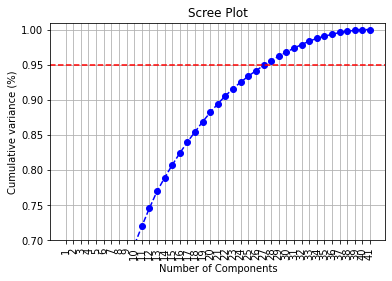

In [ ]:
fig,ax =plt.subplots()
xi=np.arange(1,X.shape[1]+1,1)
yi=np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi,yi,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y=0.95,color='r',linestyle='--')
ax.grid("both")
plt.xticks(rotation=90)
plt.show()

In [ ]:
pca = PCA(n_components = 0.95, random_state = 42)
pca.fit(X)
X_PCA = pca.transform(X)
print('Shape of x before PCA:',X.shape)
print('Shape of x after PCA:',X_PCA.shape)

Shape of x before PCA: (34967, 41)
Shape of x after PCA: (34967, 28)


In [ ]:
pca.explained_variance_ratio_

array([0.14550022, 0.11381375, 0.10488689, 0.07008478, 0.054323  ,
       0.05149554, 0.04349472, 0.03927887, 0.03615169, 0.03300541,
       0.02734328, 0.0259151 , 0.02404654, 0.01938268, 0.01822386,
       0.01698089, 0.01580534, 0.01459621, 0.01436707, 0.0131918 ,
       0.01250065, 0.01131367, 0.01019945, 0.00921461, 0.00851075,
       0.00775386, 0.00753592, 0.00681021])

**CREATING DIFFERENT MODELS USING IMBALANCED DATASET**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.20,random_state=42)

**1. KNN ALGORITHM**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      6353
           2       0.53      0.26      0.35       641

    accuracy                           0.91      6994
   macro avg       0.73      0.62      0.65      6994
weighted avg       0.89      0.91      0.90      6994

[[6203  150]
 [ 473  168]]
Accuracy Score is: 0.9109236488418645


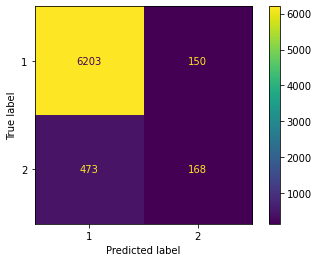

In [ ]:
print(classification_report(y_test,y_pred_knn))
result=confusion_matrix(y_test,y_pred_knn)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_knn))

**2. LOGISTIC REGRESSION**

In [ ]:
lgr= LogisticRegression(random_state=0)
lgr.fit(X_train, y_train)
y_pred_log = lgr.predict(X_test)

              precision    recall  f1-score   support

           1       0.93      0.98      0.96      6353
           2       0.61      0.25      0.35       641

    accuracy                           0.92      6994
   macro avg       0.77      0.62      0.65      6994
weighted avg       0.90      0.92      0.90      6994

[[6253  100]
 [ 483  158]]
0.9166428367171862
Accuracy Score is: 0.9166428367171862


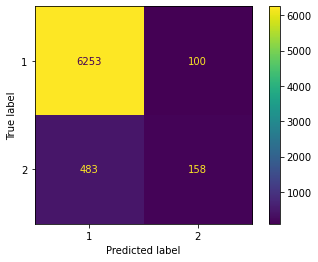

In [ ]:
print(classification_report(y_test,y_pred_log))
result=confusion_matrix(y_test,y_pred_log)
print(result)
labels=[1,2]
print(lgr.score(X_test,y_test))
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_log))

**3. NAIVE BAYES ALGORITHM**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           1       0.94      0.92      0.93      6353
           2       0.35      0.44      0.39       641

    accuracy                           0.87      6994
   macro avg       0.65      0.68      0.66      6994
weighted avg       0.89      0.87      0.88      6994

[[5826  527]
 [ 359  282]]
Accuracy Score is: 0.8733199885616243


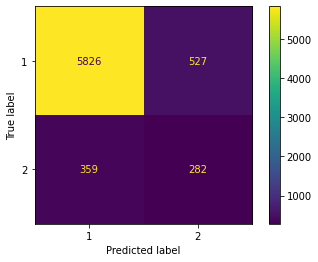

In [ ]:
print(classification_report(y_test,y_pred_nb))
result=confusion_matrix(y_test,y_pred_nb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_nb))

**4. SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred_svm=sv.predict(X_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      6353
           2       0.65      0.22      0.33       641

    accuracy                           0.92      6994
   macro avg       0.79      0.61      0.64      6994
weighted avg       0.90      0.92      0.90      6994

[[6275   78]
 [ 497  144]]
Accuracy Score is: 0.9177866742922505


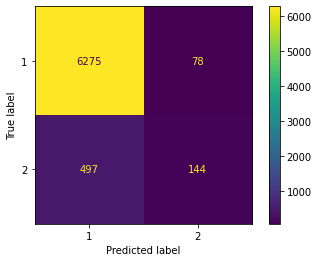

In [ ]:
print(classification_report(y_test,y_pred_svm))
result=confusion_matrix(y_test,y_pred_svm)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_svm))

**5. DECISION TREE USING GINI CRITERION**

In [ ]:
tre=DecisionTreeClassifier()
tre.fit(X_train,y_train)
y_pred_tre=tre.predict(X_test)
y_pred_tre

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           1       0.94      0.94      0.94      6353
           2       0.40      0.38      0.39       641

    accuracy                           0.89      6994
   macro avg       0.67      0.66      0.67      6994
weighted avg       0.89      0.89      0.89      6994

[[5994  359]
 [ 399  242]]
Accuracy Score is: 0.8916213897626537


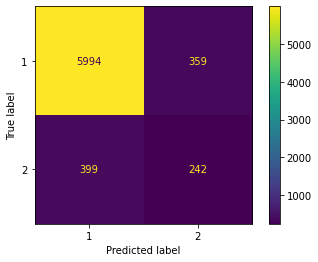

In [ ]:
print(classification_report(y_test,y_pred_tre))
result=confusion_matrix(y_test,y_pred_tre)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_tre))

**6. DECISION TREE USING ENTROPY CRITERION**

In [ ]:
tre=DecisionTreeClassifier(criterion='entropy')
tre.fit(X_train,y_train)
y_pred_tre_e=tre.predict(X_test)
y_pred_tre_e

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           1       0.94      0.94      0.94      6353
           2       0.43      0.41      0.42       641

    accuracy                           0.90      6994
   macro avg       0.68      0.68      0.68      6994
weighted avg       0.89      0.90      0.89      6994

[[5999  354]
 [ 378  263]]
Accuracy Score is: 0.8953388618816128


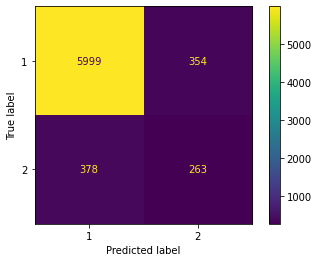

In [ ]:
print(classification_report(y_test,y_pred_tre_e))
result=confusion_matrix(y_test,y_pred_tre_e)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_tre_e))

**7. RANDOM FOREST ALGORITHM**

Parameters of Random Forest==>n_estimators,criterion,max_depth,min sample split,min sample leaf,maximum features,bootstrap,random state...

2 techniques of hyperparameter tunning
   1. GrisearchCV
   2. RandomsearchCV

GridsearchCV
         we use all the combinations of parameters to get the best accuracy.

 RandomizedSearchCV

Used to tune their hyperparameters to achieve the best accuracy.
RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

In [ ]:
rf=RandomForestClassifier()
rf_p_dist={'max_depth':[3,5,10,None],'n_estimators':[10,100,200,300,400,500]}
rdmsearch=RandomizedSearchCV(rf,param_distributions=rf_p_dist,n_iter=10,cv=5)
rdmsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [ ]:
rdmsearch.best_params_

{'n_estimators': 200, 'max_depth': 10}

In [ ]:
rfcl= RandomForestClassifier(max_depth=10,n_estimators=200) 
rfcl.fit(X_train,y_train)
y_pred_RF=rfcl.predict(X_test)

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      6353
           2       0.68      0.21      0.32       641

    accuracy                           0.92      6994
   macro avg       0.80      0.60      0.64      6994
weighted avg       0.90      0.92      0.90      6994

[[6290   63]
 [ 506  135]]
Accuracy Score is: 0.9186445524735487


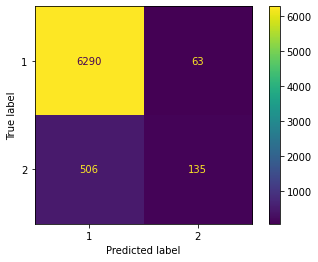

In [ ]:
print(classification_report(y_test,y_pred_RF))
result=confusion_matrix(y_test,y_pred_RF)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test,y_pred_RF))

**DIFFERENT ALGORITHMS ON BALANCED DATASET**

Balanced the data by oversampling technique using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
oversample=SMOTE()
xo,yo=oversample.fit_resample(X_PCA,y)

In [ ]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(xo,yo,test_size=.20,random_state=42)

**1. KNN ALGORITHM**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_new,y_train_new)
y_pred_knnb=knn.predict(x_test_new)
y_pred_knnb

array([2, 2, 2, ..., 2, 2, 2])

              precision    recall  f1-score   support

           1       0.99      0.86      0.92      6395
           2       0.87      0.99      0.93      6389

    accuracy                           0.92     12784
   macro avg       0.93      0.92      0.92     12784
weighted avg       0.93      0.92      0.92     12784

[[5470  925]
 [  48 6341]]
Accuracy Score is: 0.9238892365456821


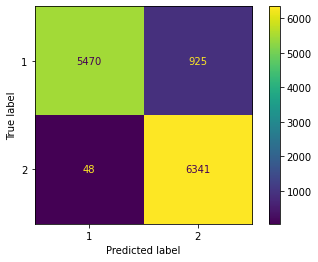

In [ ]:
print(classification_report(y_test_new,y_pred_knnb))
result=confusion_matrix(y_test_new,y_pred_knnb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_knnb))

**2. LOGISTIC REGRESSION**

In [ ]:
lgr= LogisticRegression(random_state=0)
lgr.fit(x_train_new, y_train_new)
y_pred_logb = lgr.predict(x_test_new)

              precision    recall  f1-score   support

           1       0.84      0.82      0.83      6395
           2       0.82      0.85      0.84      6389

    accuracy                           0.83     12784
   macro avg       0.83      0.83      0.83     12784
weighted avg       0.83      0.83      0.83     12784

[[5241 1154]
 [ 963 5426]]
0.8344023779724656
Accuracy Score is: 0.8344023779724656


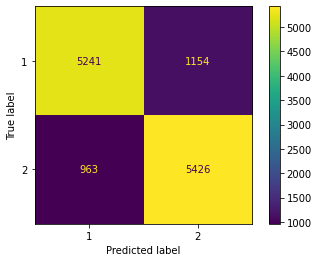

In [ ]:
print(classification_report(y_test_new,y_pred_logb))
result=confusion_matrix(y_test_new,y_pred_logb)
print(result)
labels=[1,2]
print(lgr.score(x_test_new,y_test_new))
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_logb))

**3. NAIVE BAYES ALGRITHM**

In [ ]:
nb=GaussianNB()
nb.fit(x_train_new,y_train_new)
y_pred_nbb=nb.predict(x_test_new)
y_pred_nbb

array([2, 1, 1, ..., 2, 2, 2])

              precision    recall  f1-score   support

           1       0.76      0.84      0.80      6395
           2       0.82      0.74      0.78      6389

    accuracy                           0.79     12784
   macro avg       0.79      0.79      0.79     12784
weighted avg       0.79      0.79      0.79     12784

[[5356 1039]
 [1650 4739]]
Accuracy Score is: 0.7896589486858573


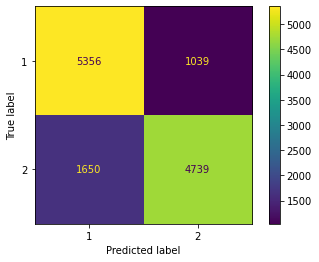

In [ ]:
print(classification_report(y_test_new,y_pred_nbb))
result=confusion_matrix(y_test_new,y_pred_nbb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_nbb))

**4. SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
sv=SVC()
sv.fit(x_train_new,y_train_new)
y_pred_svmb=sv.predict(x_test_new)
y_pred_svmb

array([2, 2, 1, ..., 2, 2, 2])

              precision    recall  f1-score   support

           1       0.95      0.87      0.91      6395
           2       0.88      0.95      0.92      6389

    accuracy                           0.91     12784
   macro avg       0.91      0.91      0.91     12784
weighted avg       0.91      0.91      0.91     12784

[[5580  815]
 [ 311 6078]]
Accuracy Score is: 0.9119211514392991


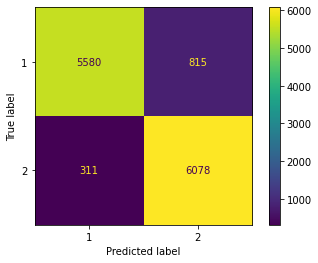

In [ ]:
print(classification_report(y_test_new,y_pred_svmb))
result=confusion_matrix(y_test_new,y_pred_svmb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_svmb))

**5. DECISION TREE ALGORITHM WITH GINI CRITERION**

In [ ]:
tre=DecisionTreeClassifier()
tre.fit(x_train_new,y_train_new)
y_pred_treb=tre.predict(x_test_new)
y_pred_treb

array([2, 2, 2, ..., 2, 2, 2])

              precision    recall  f1-score   support

           1       0.92      0.89      0.90      6395
           2       0.89      0.93      0.91      6389

    accuracy                           0.91     12784
   macro avg       0.91      0.91      0.91     12784
weighted avg       0.91      0.91      0.91     12784

[[5669  726]
 [ 477 5912]]
Accuracy Score is: 0.905897997496871


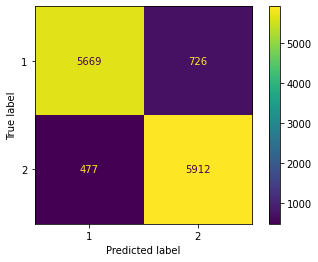

In [ ]:
print(classification_report(y_test_new,y_pred_treb))
result=confusion_matrix(y_test_new,y_pred_treb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_treb))

**6. DECISION TREE ALGORITHM WITH ENTROPY CRITERION**

In [ ]:
tre=DecisionTreeClassifier(criterion='entropy')
tre.fit(x_train_new,y_train_new)
y_pred_trebe=tre.predict(x_test_new)
y_pred_trebe

array([2, 2, 2, ..., 2, 2, 2])

              precision    recall  f1-score   support

           1       0.93      0.89      0.91      6395
           2       0.90      0.93      0.91      6389

    accuracy                           0.91     12784
   macro avg       0.91      0.91      0.91     12784
weighted avg       0.91      0.91      0.91     12784

[[5697  698]
 [ 431 5958]]
Accuracy Score is: 0.9116864831038799


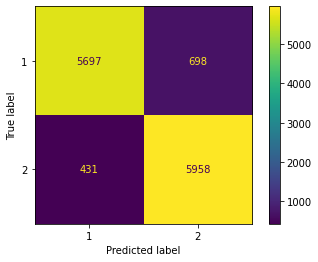

In [ ]:
print(classification_report(y_test_new,y_pred_trebe))
result=confusion_matrix(y_test_new,y_pred_trebe)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_trebe))

**7. RANDOM FOREST CLASSIFIER ALGORITHM**

In [ ]:
rfb=RandomForestClassifier()
rf_p_dist={'max_depth':[3,5,10,None],'n_estimators':[10,100,200,300,400,500]}
rdmsearch=RandomizedSearchCV(rfb,param_distributions=rf_p_dist,n_iter=5,cv=5)
rdmsearch.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [ ]:
rdmsearch.best_params_ 

{'n_estimators': 500, 'max_depth': None}

In [ ]:
rfclb= RandomForestClassifier(max_depth=None,n_estimators=500) 
rfclb.fit(x_train_new,y_train_new)
y_pred_RFb=rfclb.predict(x_test_new)

              precision    recall  f1-score   support

           1       0.98      0.93      0.95      6395
           2       0.93      0.98      0.96      6389

    accuracy                           0.96     12784
   macro avg       0.96      0.96      0.96     12784
weighted avg       0.96      0.96      0.96     12784

[[5948  447]
 [ 121 6268]]
Accuracy Score is: 0.9555694618272841


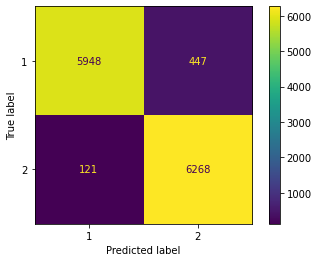

In [ ]:
print(classification_report(y_test_new,y_pred_RFb))
result=confusion_matrix(y_test_new,y_pred_RFb)
print(result)
labels=[1,2]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score is:',accuracy_score(y_test_new,y_pred_RFb))

In [ ]:
Accuracy_df=pd.DataFrame()
Accuracy_df['Classifier']=['kNN','Logistic Regression','Naive Bayes','SVM','Decision Tree(gini)','Decision Tree(entropy)','Random Forest']
Accuracy_df['Accuracy of Imbalanced Data'] = [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_log),accuracy_score(y_test,y_pred_nb),
                            accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_tre),accuracy_score(y_test,y_pred_tre_e),
                            accuracy_score(y_test,y_pred_RF)]
Accuracy_df['Accuracy of Balanced Data']=[accuracy_score(y_test_new,y_pred_knnb),accuracy_score(y_test_new,y_pred_logb),
                            accuracy_score(y_test_new,y_pred_nbb),accuracy_score(y_test_new,y_pred_svmb),accuracy_score(y_test_new,y_pred_treb),
                           accuracy_score(y_test_new,y_pred_trebe),accuracy_score(y_test_new,y_pred_RFb)]

In [ ]:
Accuracy_df

,Classifier,Accuracy of Imbalanced Data,Accuracy of Balanced Data
0,kNN,0.910924,0.923889
1,Logistic Regression,0.916643,0.834402
2,Naive Bayes,0.873320,0.789659
3,SVM,0.917787,0.911921
4,Decision Tree(gini),0.891621,0.905898
5,Decision Tree(entropy),0.895339,0.911686
6,Random Forest,0.918645,0.955569


Model created with Random Forest Classifier using Balanced dataset gives highest accuracy about 95.56%.